In [2]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [5]:
cat4 = cv2.imread('C:/OpenCV/DATA/CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
type(cat4)

numpy.ndarray

In [6]:
cat4.shape

(375, 500, 3)

In [7]:
dog2 = cv2.imread('C:/OpenCV/DATA/CATS_DOGS/train/Dog/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)
type(dog2)

numpy.ndarray

In [9]:
dog2.shape

(199, 188, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
img_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

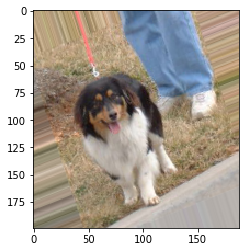

In [14]:
# an example of the different img that we generated using ImageDataGenerator
plt.imshow(img_gen.random_transform(dog2))

In [17]:
img_gen.flow_from_directory("C:/OpenCV/DATA/CATS_DOGS/train")

Found 18743 images belonging to 2 classes.


In [45]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense

In [46]:
input_shape = (150,150,3)

In [47]:
model = Sequential()

In [48]:

model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape= (150,150,3), activation="relu" ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape= (150,150,3), activation="relu" ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape= (150,150,3), activation="relu" ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation("relu"))

# turns off 50% of neurons to prevent overfitting
model.add(Dropout(0.5))

# "1" neruon since it is binary and we only have two ouput (either 1 for dog or 0 for cat) 
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer ="adam", metrics=["accuracy"])

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9248)              0         
__________

In [50]:
# amount of img to train your network
batch_size = 16

train_img_gen = img_gen.flow_from_directory("C:/OpenCV/DATA/CATS_DOGS/train", 
                                            target_size=input_shape[:2],
                                            batch_size=batch_size,
                                            class_mode="binary")

Found 18743 images belonging to 2 classes.


In [51]:
test_img_gen = img_gen.flow_from_directory("C:/OpenCV/DATA/CATS_DOGS/test", 
                                            target_size=input_shape[:2],
                                            batch_size=batch_size,
                                            class_mode="binary")

Found 6251 images belonging to 2 classes.


In [52]:
train_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [53]:
# will take way to long to train this model. thats why we load from the instructor's premade model.

# results = model.fit_generator(train_image_gen,epochs=100,
#                               steps_per_epoch=150,
#                               validation_data=test_image_gen,
#                              validation_steps=12)

In [2]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image


Using TensorFlow backend.


In [3]:
newmodel = load_model("c:/OpenCV/Computer-Vision-with-Python/06-Deep-Learning-Computer-Vision/cat_dog_100epochs.h5")

In [4]:
dog_file = 'C:/OpenCV/DATA/CATS_DOGS/test/DOG/10005.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [5]:
# Bruh it got it wrong
model.predict_classes(dog_img)

NameError: name 'model' is not defined